# Ages of World Leaders

- Date: 2019-04-25
- Source: [REIGN Dataset](https://oefresearch.org/datasets/reign)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from src.plot import ds_plot

%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None

plt.style.use('../assets/datastory.mpltstyle')

In [2]:
df = pd.read_csv('../data/raw/2019-04-25-age-of-leaders/REIGN_2019_3.csv')

## Overview

In [3]:
df.head()

,ccode,country,leader,year,month,elected,age,male,militarycareer,tenure_months,...,delayed,lastelection,loss,irregular,prev_conflict,pt_suc,pt_attempt,precip,couprisk,pctile_risk
0,2.0,USA,Truman,1950.0,1.0,1.0,66.0,1.0,0.0,58.0,...,0.0,2.639057,5.327876,7.565793,0.0,0.0,0.0,-0.049647,NaN,NaN
1,2.0,USA,Truman,1950.0,2.0,1.0,66.0,1.0,0.0,59.0,...,0.0,2.708050,5.332719,7.566311,0.0,0.0,0.0,-0.093614,NaN,NaN
2,2.0,USA,Truman,1950.0,3.0,1.0,66.0,1.0,0.0,60.0,...,0.0,2.772589,5.337538,7.566829,0.0,0.0,0.0,-0.086233,NaN,NaN
3,2.0,USA,Truman,1950.0,4.0,1.0,66.0,1.0,0.0,61.0,...,0.0,2.833213,5.342334,7.567346,0.0,0.0,0.0,-0.019793,NaN,NaN
4,2.0,USA,Truman,1950.0,5.0,1.0,66.0,1.0,0.0,62.0,...,0.0,2.890372,5.347107,7.567863,0.0,0.0,0.0,-0.107695,NaN,NaN


In [4]:
df.shape

(132965, 38)

In [5]:
df.columns

Index(['ccode', 'country', 'leader', 'year', 'month', 'elected', 'age', 'male',
       'militarycareer', 'tenure_months', 'government', 'anticipation',
       'ref_ant', 'leg_ant', 'exec_ant', 'irreg_lead_ant', 'election_now',
       'election_recent', 'leg_recent', 'exec_recent', 'lead_recent',
       'ref_recent', 'direct_recent', 'indirect_recent', 'victory_recent',
       'defeat_recent', 'change_recent', 'nochange_recent', 'delayed',
       'lastelection', 'loss', 'irregular', 'prev_conflict', 'pt_suc',
       'pt_attempt', 'precip', 'couprisk', 'pctile_risk'],
      dtype='object')

## Transform data

In [6]:
# Remove redundant columns
cols = ['ccode', 'country', 'leader', 'year', 'month',
        'elected', 'age', 'male', 'government']
df = df.filter(cols)

In [7]:
# Remove empty rows
df = df.dropna(subset=['leader'])

In [8]:
# Overwrite country codes with Datastory country codes
countries = pd.read_csv('../data/raw/2019-04-25-age-of-leaders/countries.csv')
countries_map = countries.set_index('name').country.to_dict()
alt_names = pd.read_csv('../data/raw/2019-04-25-age-of-leaders/countries_alt_name.csv')
countries_map.update(alt_names.set_index('country_alt_name').country.to_dict())
df['ccode'] = df.country.map(countries_map)
df = df.merge(countries[['country', 'world_6region']],
              left_on='ccode', right_on='country', how='left')
df = df.drop('country_y', axis=1).rename(columns={'country_x': 'country'})

In [9]:
age_by_region = (df
    .groupby(['world_6region', 'year'])
    .age.mean()
    .reset_index()
    .pivot_table(columns='world_6region', index='year', values='age'))

In [10]:
age_by_region = age_by_region.rename(columns={
    'america': 'Amerika',
    'east_asia_pacific': 'Östasien och Stilla havsområdet',
    'europe_central_asia': 'Europa och Centralasien',
    'middle_east_north_africa': 'Mellanöstern och Nordafrika',
    'south_asia': 'Sydasien',
    'sub_saharan_africa': 'Afrika söder om Sahara'
})

In [11]:
age_by_year = df.groupby('year').age.mean()

## Plot

In [12]:
# Plot settings
colors = ['#806ced', '#57d298', '#972bf1',
          '#ffc830', '#f85242', '#2bbaff']

# Change some of the defaults to
# accomodate small multiples
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titleweight'] = 500
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.size'] = 5

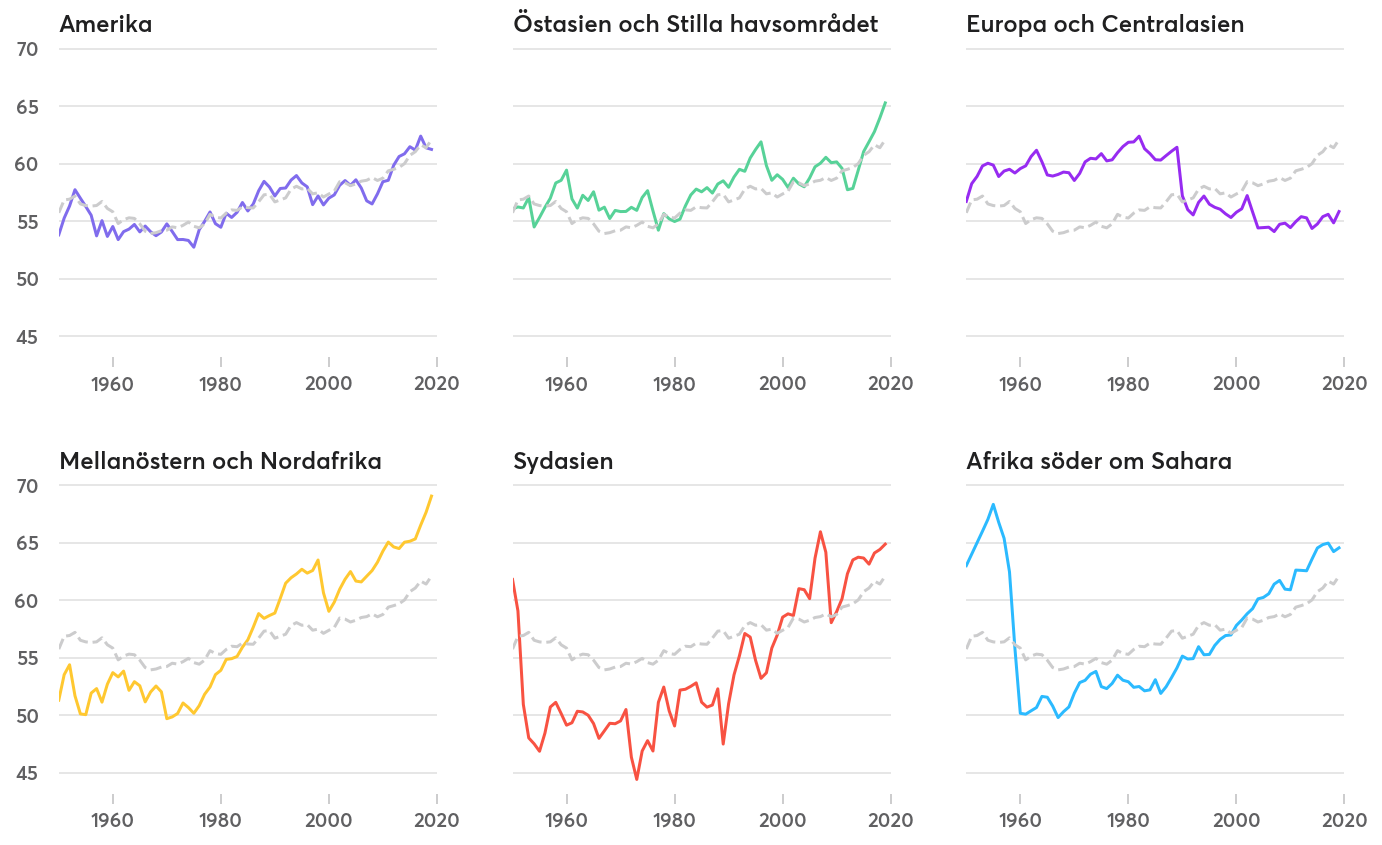

In [13]:
fig, axes = ds_plot(2, 3, sharey=True, gridspec_kw={'hspace': 0.4})

for ax, region, color in zip(axes.flat, age_by_region.columns, colors):
    ax.plot(age_by_region[region], c=color)
    ax.plot(age_by_year, c='#cccccd', ls='--')
    ax.set_xlim(1950, 2020)
    ax.text(1950, 71, region, va='bottom', ha='left', size=12, color='#202021')